In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def remove_zero_columns(data):
    for column in data.columns:
        if column == 'label':
            continue
        if data[column].sum() == 0:
            data.drop(column, axis=1, inplace=True)
    return data

In [4]:
dominant_color = pd.read_csv('dominant_colors.csv')
histogram = pd.read_csv('histograms.csv')
texture = pd.read_csv('texture_features.csv')
labels = pd.read_csv('labels.csv')
shapes = pd.read_csv('shape_features.csv')

import random
random.seed(42)
random_10 = random.sample(list(labels['label'].unique()), 10)
random_20 = random.sample(list(labels['label'].unique()), 20)

In [5]:
data = pd.concat([texture,dominant_color,histogram, shapes,labels] , axis=1)
data = remove_zero_columns(data)
data_10 = data[data['label'].isin(random_10)]
data_20 = data[data['label'].isin(random_20)]

In [7]:
def results(y_pred, y_test, labels):
    from sklearn.metrics import precision_score, recall_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt

    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: ', accuracy)
    precision = precision_score(y_test, y_pred, average='weighted')
    print('Precision: ', precision)
    recall = recall_score(y_test, y_pred, average='weighted')
    print('Recall: ', recall)
    f1 = 2 * (precision * recall) / (precision + recall)
    print('F1 Score: ', f1)
    
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    true_positive = np.diag(conf_matrix)
    print('True Positive: ', true_positive)

    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='g')  # 'g' format ensures that integers are displayed properly

    # Setting labels, title and ticks
    plt.ylabel('Actual', fontsize=12)
    plt.title('Confusion Matrix', fontsize=15)
    plt.xticks(np.arange(len(labels)) + 0.5, labels, rotation=45, ha='right')  # Adjust tick positions and labels
    plt.yticks(np.arange(len(labels)) + 0.5, labels, rotation=0)

# SVM 10 Class

Accuracy:  0.344
Precision:  0.3368847587767838
Recall:  0.344
F1 Score:  0.34040520227654447
True Positive:  [33 22 32 44 30 15 43 59 27 39]


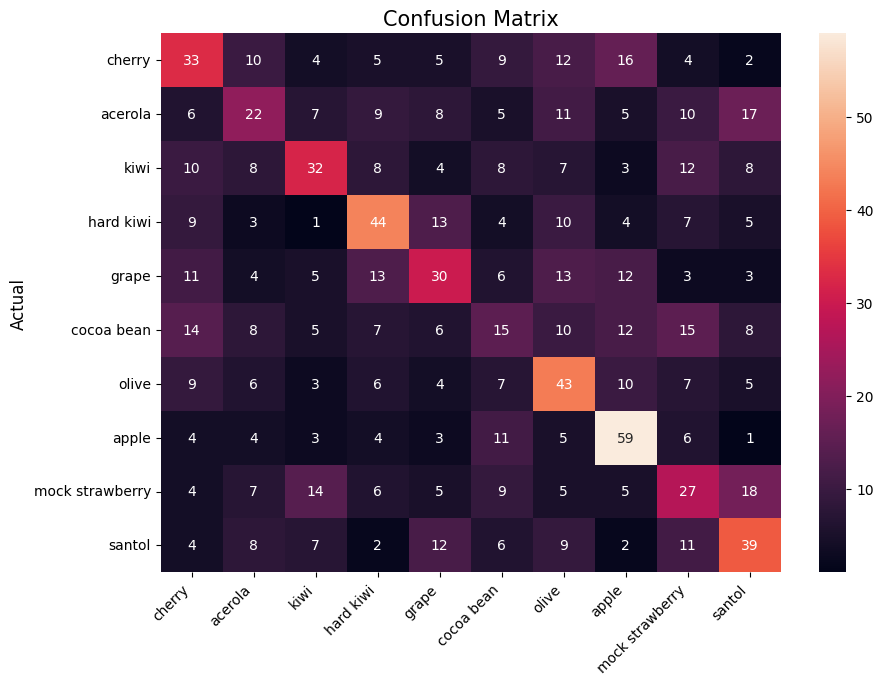

In [24]:
data_svm = data_10.copy()

#train svm model
from sklearn import svm
from sklearn.model_selection import train_test_split

X = data_svm.drop('label', axis=1)
y = data_svm['label']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = svm.SVC(kernel='rbf', C=100, gamma='auto')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

results(y_pred, y_test, random_10)

# SVM 20 Class

Accuracy:  0.288
Precision:  0.2898229328673528
Recall:  0.288
F1 Score:  0.28890859091243115
True Positive:  [48 20 33 22 33 30 34 25 19 37 19 28 13 28 34 14 50 29 23 37]


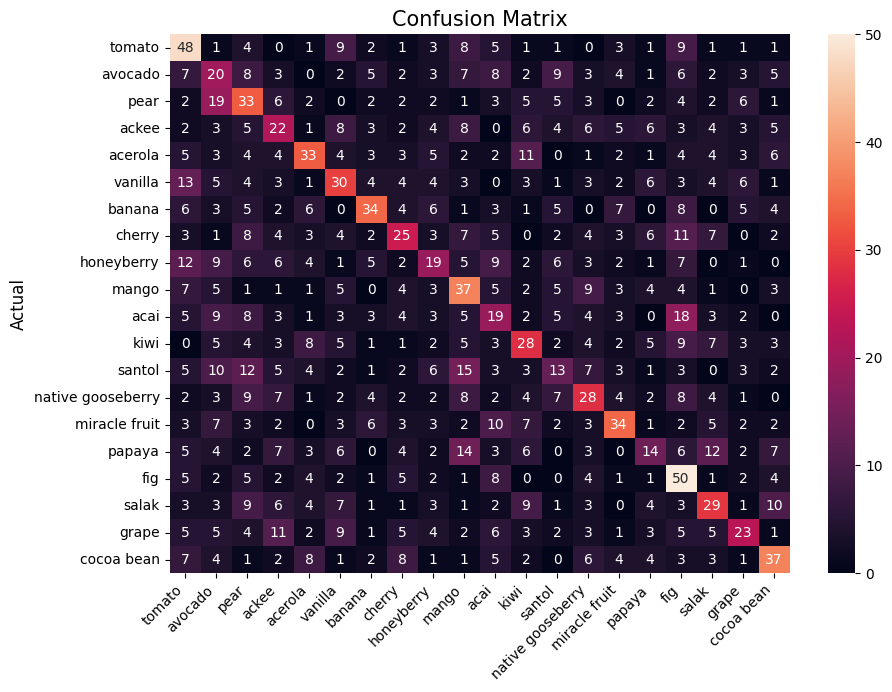

In [25]:
data_svm = data_20.copy()

#train svm model
from sklearn import svm
from sklearn.model_selection import train_test_split

X = data_svm.drop('label', axis=1)
y = data_svm['label']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = svm.SVC(kernel='rbf', C=100, gamma='auto')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

results(y_pred, y_test, random_20)

# RANDOM FOREST with 20 Class

Accuracy:  0.3135
Precision:  0.3024567559700799
Recall:  0.3135
F1 Score:  0.307879383017031
True Positive:  [52 18 32  4 23 44 49 35 20 39 22 30 26 30 39 11 55 33 27 38]


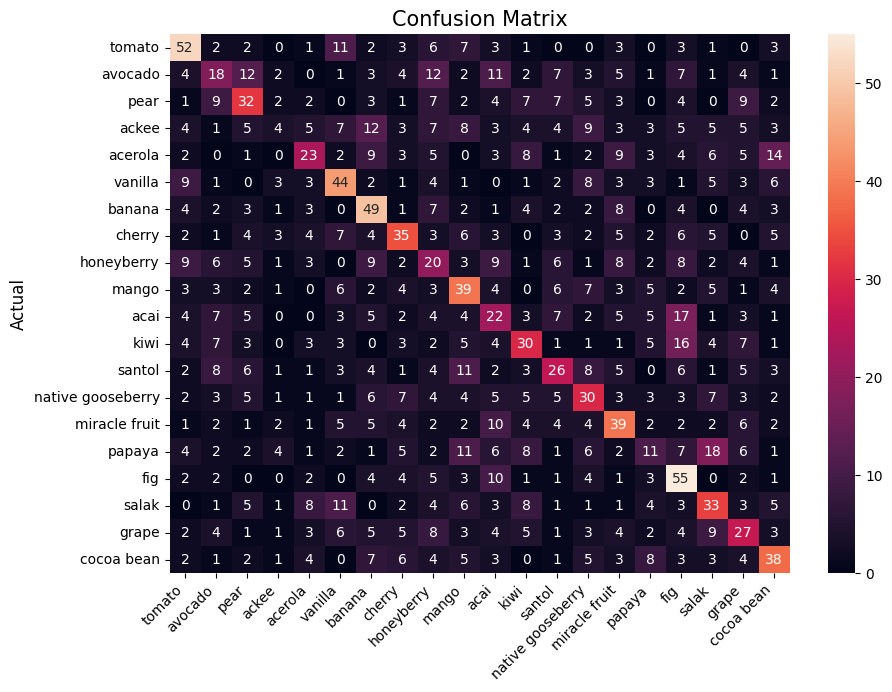

In [26]:
from sklearn.ensemble import RandomForestClassifier

data_rf = data_20.copy()

X = data_rf.drop('label', axis=1)
y = data_rf['label']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = RandomForestClassifier(n_estimators=3000, max_depth=25, random_state=42, criterion='gini', 
                             min_samples_split=2, min_samples_leaf=5, n_jobs=-1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

results(y_pred, y_test, random_20)

# RANDOM FOREST with 10 class

Accuracy:  0.367
Precision:  0.37087115103987717
Recall:  0.367
F1 Score:  0.3689254207589397
True Positive:  [36 34 37 56 29 19 38 51 29 38]


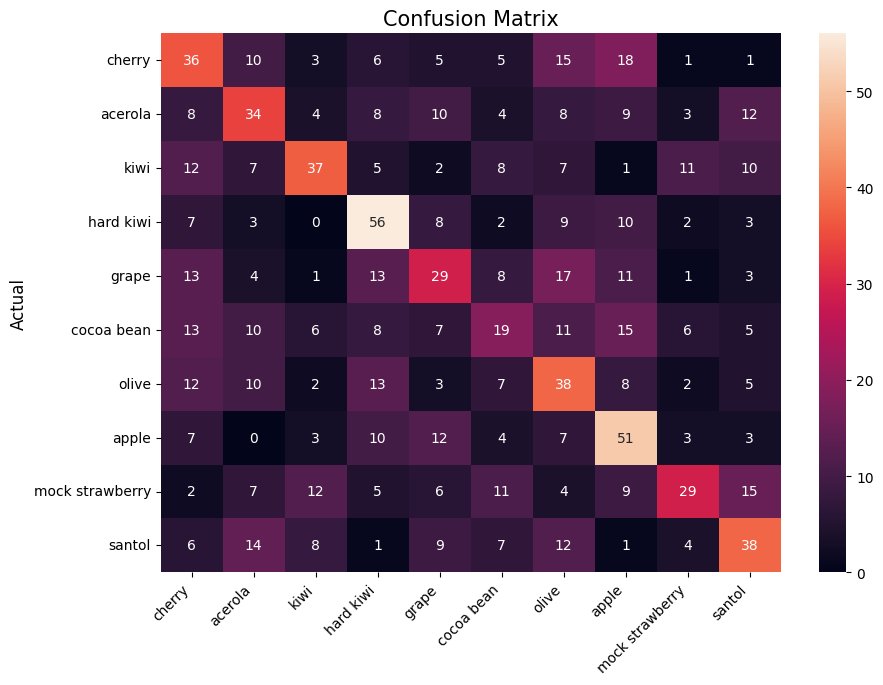

In [27]:
from sklearn.ensemble import RandomForestClassifier

data_rf = data_10.copy()

X = data_rf.drop('label', axis=1)
y = data_rf['label']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = RandomForestClassifier(n_estimators=3000, max_depth=25, random_state=42, criterion='gini', 
                             min_samples_split=2, min_samples_leaf=5, n_jobs=-1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

results(y_pred, y_test, random_10)

# KNN 20 Class

Accuracy:  0.237
Precision:  0.2449521750219302
Recall:  0.237
F1 Score:  0.24091048236292675
True Positive:  [54 26 35 15 24 26 32 27 11 22 15 22 19 11 27 13 32 17 26 20]


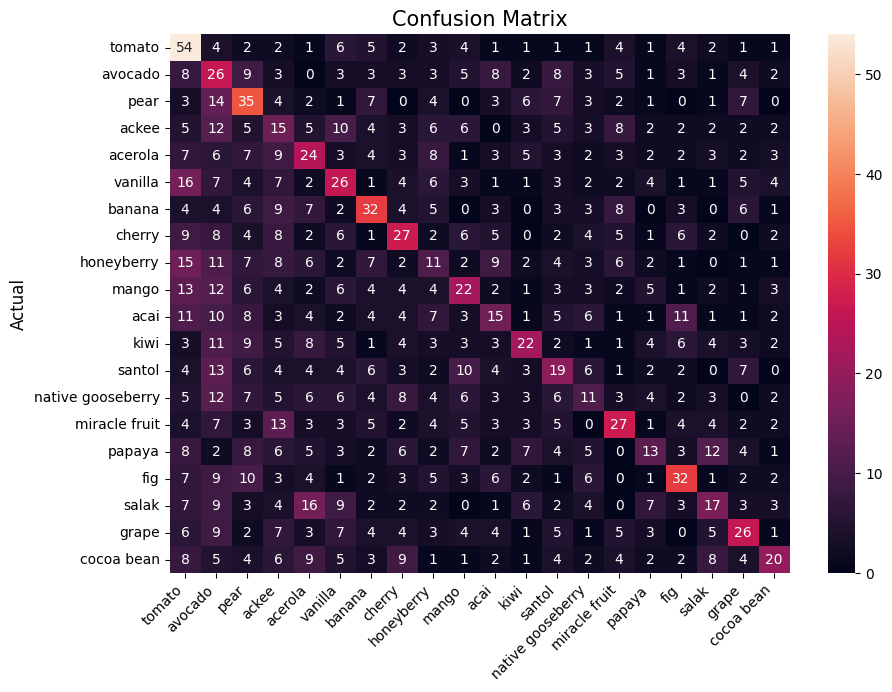

In [28]:
from sklearn.neighbors import KNeighborsClassifier

data_knn = data_20.copy()

X = data_knn.drop('label', axis=1)
y = data_knn['label']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

results(y_pred, y_test, random_20)

# KNN 10 Class

Accuracy:  0.302
Precision:  0.3048965953128811
Recall:  0.302
F1 Score:  0.3034413852231929
True Positive:  [44 22 32 45 27 15 28 35 20 34]


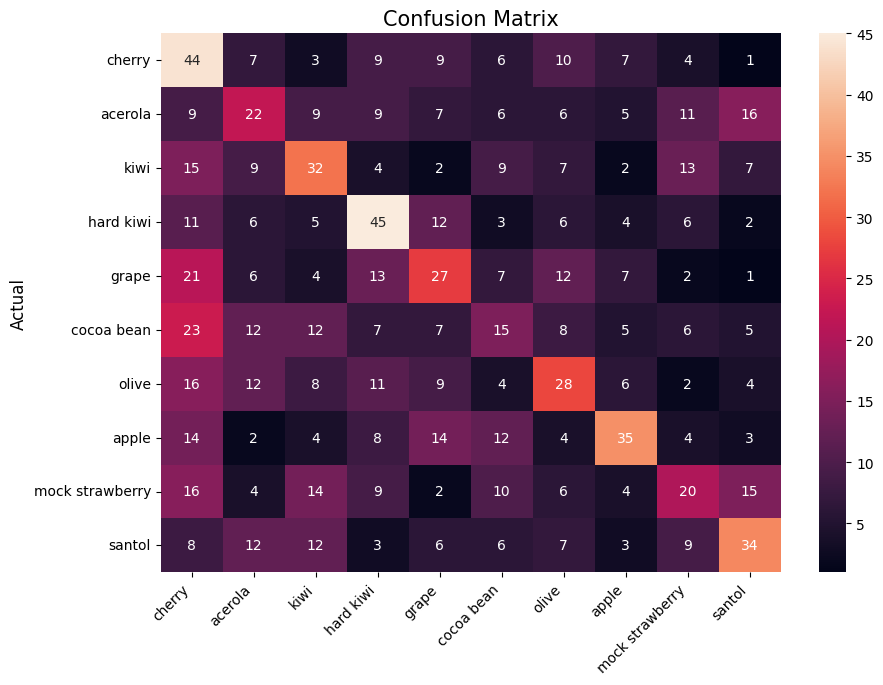

In [29]:
data_knn = data_10.copy()

X = data_knn.drop('label', axis=1)
y = data_knn['label']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

results(y_pred, y_test, random_10)

# XGBOOST 20 Class

Accuracy:  0.2885
Precision:  0.2860387151600244
Recall:  0.2885
F1 Score:  0.28726408559145544
True Positive:  [46 21 25 19 34 30 41 36 14 25 17 28 22 26 30 18 48 29 29 39]


['xgb20_model.pkl']

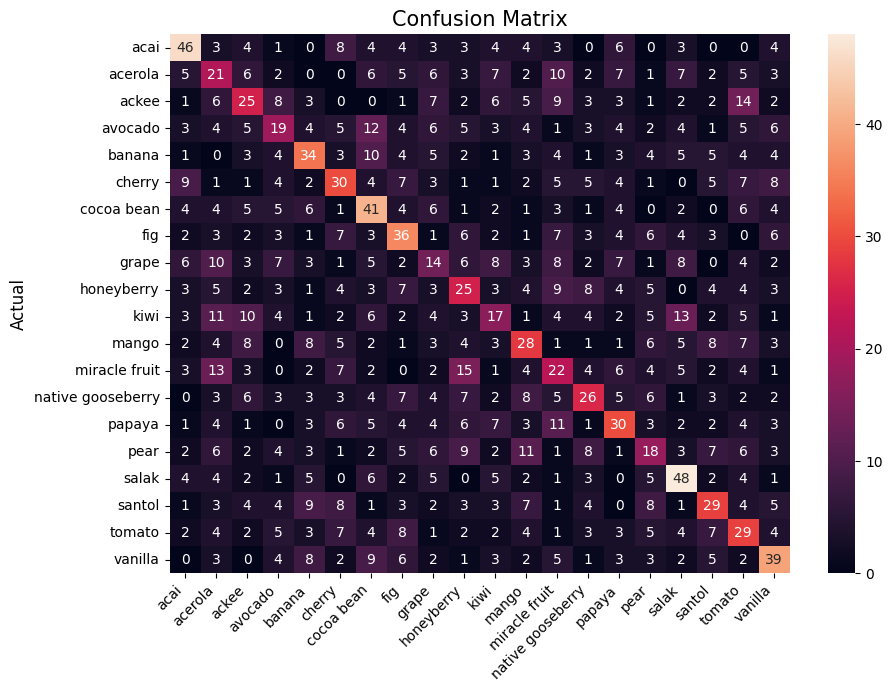

In [30]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

data_xgb = data_20.copy()

X = data_xgb.drop('label', axis=1)
y = data_xgb['label']
# Scaling features
xgb20_scaler = StandardScaler()
X = xgb20_scaler.fit_transform(X)

# Encoding labels
xgb20_label_encoder = LabelEncoder()
y_encoded = xgb20_label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

clf = XGBClassifier(n_estimators=4000, max_depth=30, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

labels_for_plot_xgb20 = xgb20_label_encoder.inverse_transform(sorted(np.unique(y_test)))
results(y_pred, y_test, labels_for_plot_xgb20)

#save models
import joblib

joblib.dump(clf, 'xgb20_model.pkl')

# XGBOOST 10 Class

Accuracy:  0.373
Precision:  0.3713154380742778
Recall:  0.373
F1 Score:  0.37215581275605397
True Positive:  [33 34 39 48 28 23 35 56 34 43]


['xgb10_model.pkl']

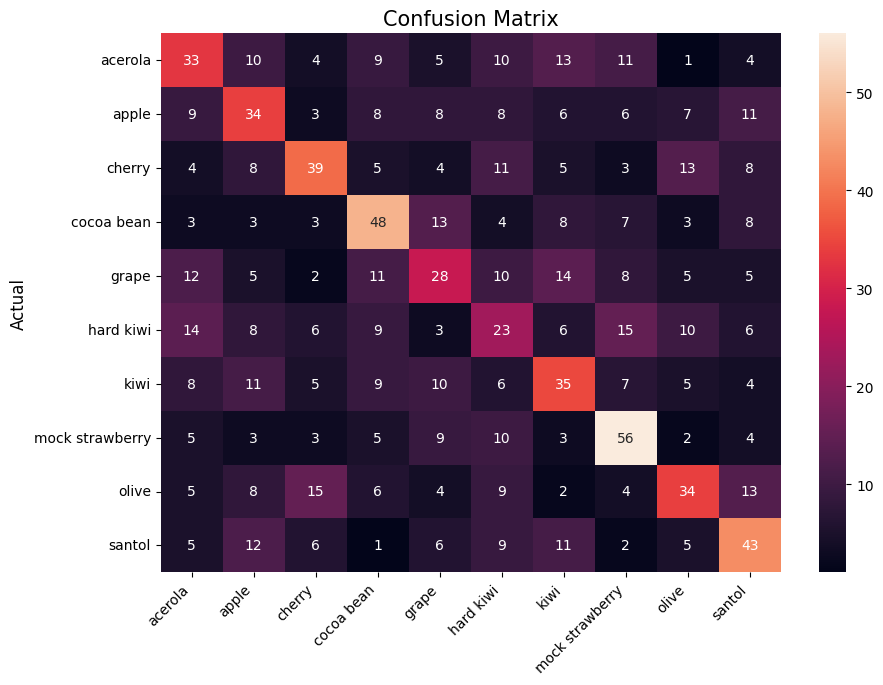

In [12]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.model_selection import train_test_split

data_xgb = data_10.copy()

X = data_xgb.drop('label', axis=1)
y = data_xgb['label']

# Scaling features
xgb10_scaler = StandardScaler()
X = xgb10_scaler.fit_transform(X)

#save xgb10_scaler
joblib.dump(xgb10_scaler, 'xgb10_scaler.pkl')

# Encoding labels
xgb10_label_encoder = LabelEncoder()
y_encoded = xgb10_label_encoder.fit_transform(y)

joblib.dump(xgb10_label_encoder, 'xgb10_label_encoder.pkl')

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

clf = XGBClassifier(n_estimators=2000, max_depth=20, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

labels_for_plot_xgb10 = xgb10_label_encoder.inverse_transform(sorted(np.unique(y_test)))
results(y_pred, y_test, labels_for_plot_xgb10)

#save models
import joblib

joblib.dump(clf, 'xgb10_model.pkl')

In [32]:
xgb_10 = joblib.load('xgb10_model.pkl')
xgb_20 = joblib.load('xgb20_model.pkl')

#load batch features
batch_df = pd.read_csv('batch_features.csv')
batch_df = remove_zero_columns(batch_df)

In [33]:
batch_df.head(3)

,mean_lbp,var_lbp,H,S,V,0,2,Area,Perimeter,Aspect Ratio,Extent,Solidity,label,path
0,7.936114,0.519979,0,7,4,0.008166,0.991834,20.032338,84.691378,1.097249,0.099400,0.244451,cocoa bean,cocoa bean\821.jpg
1,7.934769,0.517595,1,7,4,0.008154,0.991846,14.644986,94.288563,1.055333,0.037515,0.141314,cocoa bean,cocoa bean\822.jpg
2,7.939136,0.484108,0,0,7,0.007621,0.992379,24.966203,94.148187,1.172223,0.084677,0.216357,cocoa bean,cocoa bean\823.jpg


In [34]:
#predict using xgb_10 model
X = batch_df.drop(['label', 'path'], axis=1)
y = batch_df['label']
xgb_10_X = xgb10_scaler.transform(X)
xgb_10_y = xgb10_label_encoder.transform(y)

xgb10_y_pred = xgb_10.predict(xgb_10_X)

#predict using xgb_20 model
xgb_20_X = xgb20_scaler.transform(X)
xgb_20_y = xgb20_label_encoder.transform(y)

xgb20_y_pred = xgb_20.predict(xgb_20_X)

In [35]:
results_df = pd.DataFrame({'xgb_10': xgb10_y_pred,  'actual_10': xgb_10_y, 'xgb_20': xgb20_y_pred, 'actual_20' : xgb_20_y , 'path': batch_df['path']})

In [36]:
results_df.head(20)

,xgb_10,actual_10,xgb_20,actual_20,path
0,3,3,6,6,cocoa bean\821.jpg
1,3,3,3,6,cocoa bean\822.jpg
2,3,3,14,6,cocoa bean\823.jpg
3,3,3,6,6,cocoa bean\824.jpg
4,3,3,6,6,cocoa bean\829.jpg
5,3,3,6,6,cocoa bean\832.jpg
6,3,3,4,6,cocoa bean\835.jpg
7,3,3,6,6,cocoa bean\836.jpg
8,3,3,6,6,cocoa bean\837.jpg
9,3,3,6,6,cocoa bean\838.jpg


As we can see, the better model is the XGBOOST with 10 classes. XGBOOST with 20 classes model has tend to predict another class.

True predicted with both xgb_10 and xgb_20 

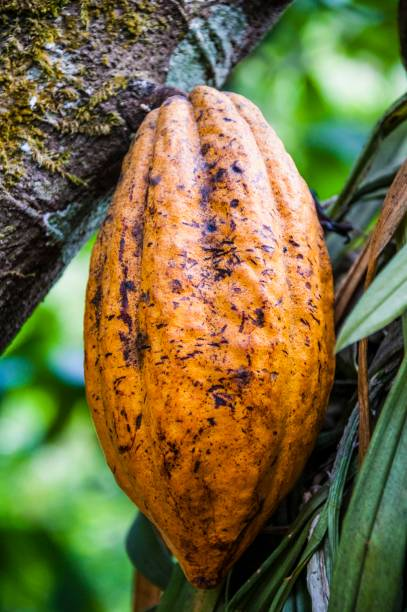 

---------------------------------------

False predicted with xgb_20 and true predicted with xgb_10

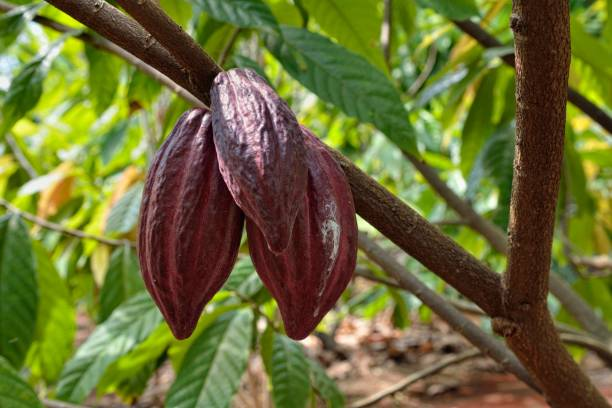 